<a href="https://colab.research.google.com/github/Uysim/on-time-flight-analysis/blob/master/on_time_flight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On Time Flight Analysis

In this notebook we analysis the flight data to pick an airline that more likely to arrive on time. 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
!wget -q https://raw.githubusercontent.com/Uysim/on-time-flight-analysis/master/formatted_flights.csv -O formatted_flights.csv

In [0]:
flights = pd.read_csv("formatted_flights.csv")

In [73]:
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [74]:
flights["arr_delay"].min()

-60.0

In [75]:
flights["arr_delay"].max()

120.0

Turn out 

*   Minimum average delay is -60 minutes. Mean that flight arrived earlier for 60 minutes
*   Maximum average delay is 120 minutes. Mean that flight arrived late for 60 minutes




### Histogram

Text(0.5, 1.0, 'Histogram of Arrival Delays')

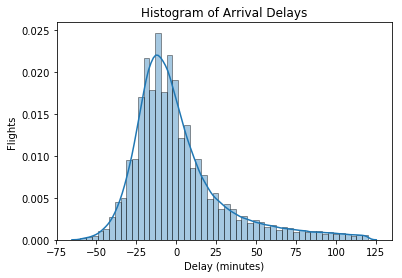

In [76]:
min_delay = -60
max_delay = 120
bins = int((max_delay - min_delay)/5) # group by each 5 minutes

ax = sns.distplot(flights['arr_delay'], hist=True, kde=True, hist_kws={'edgecolor':'black'})
ax.set(xlabel ='Delay (minutes)', ylabel ='Flights') 
plt.title('Histogram of Arrival Delays')

In [0]:
airline_names = flights["name"].unique()

We will plot each average delay of the airline and compare all of them
In order to help the insight we will calculate the mean and show them at the top.

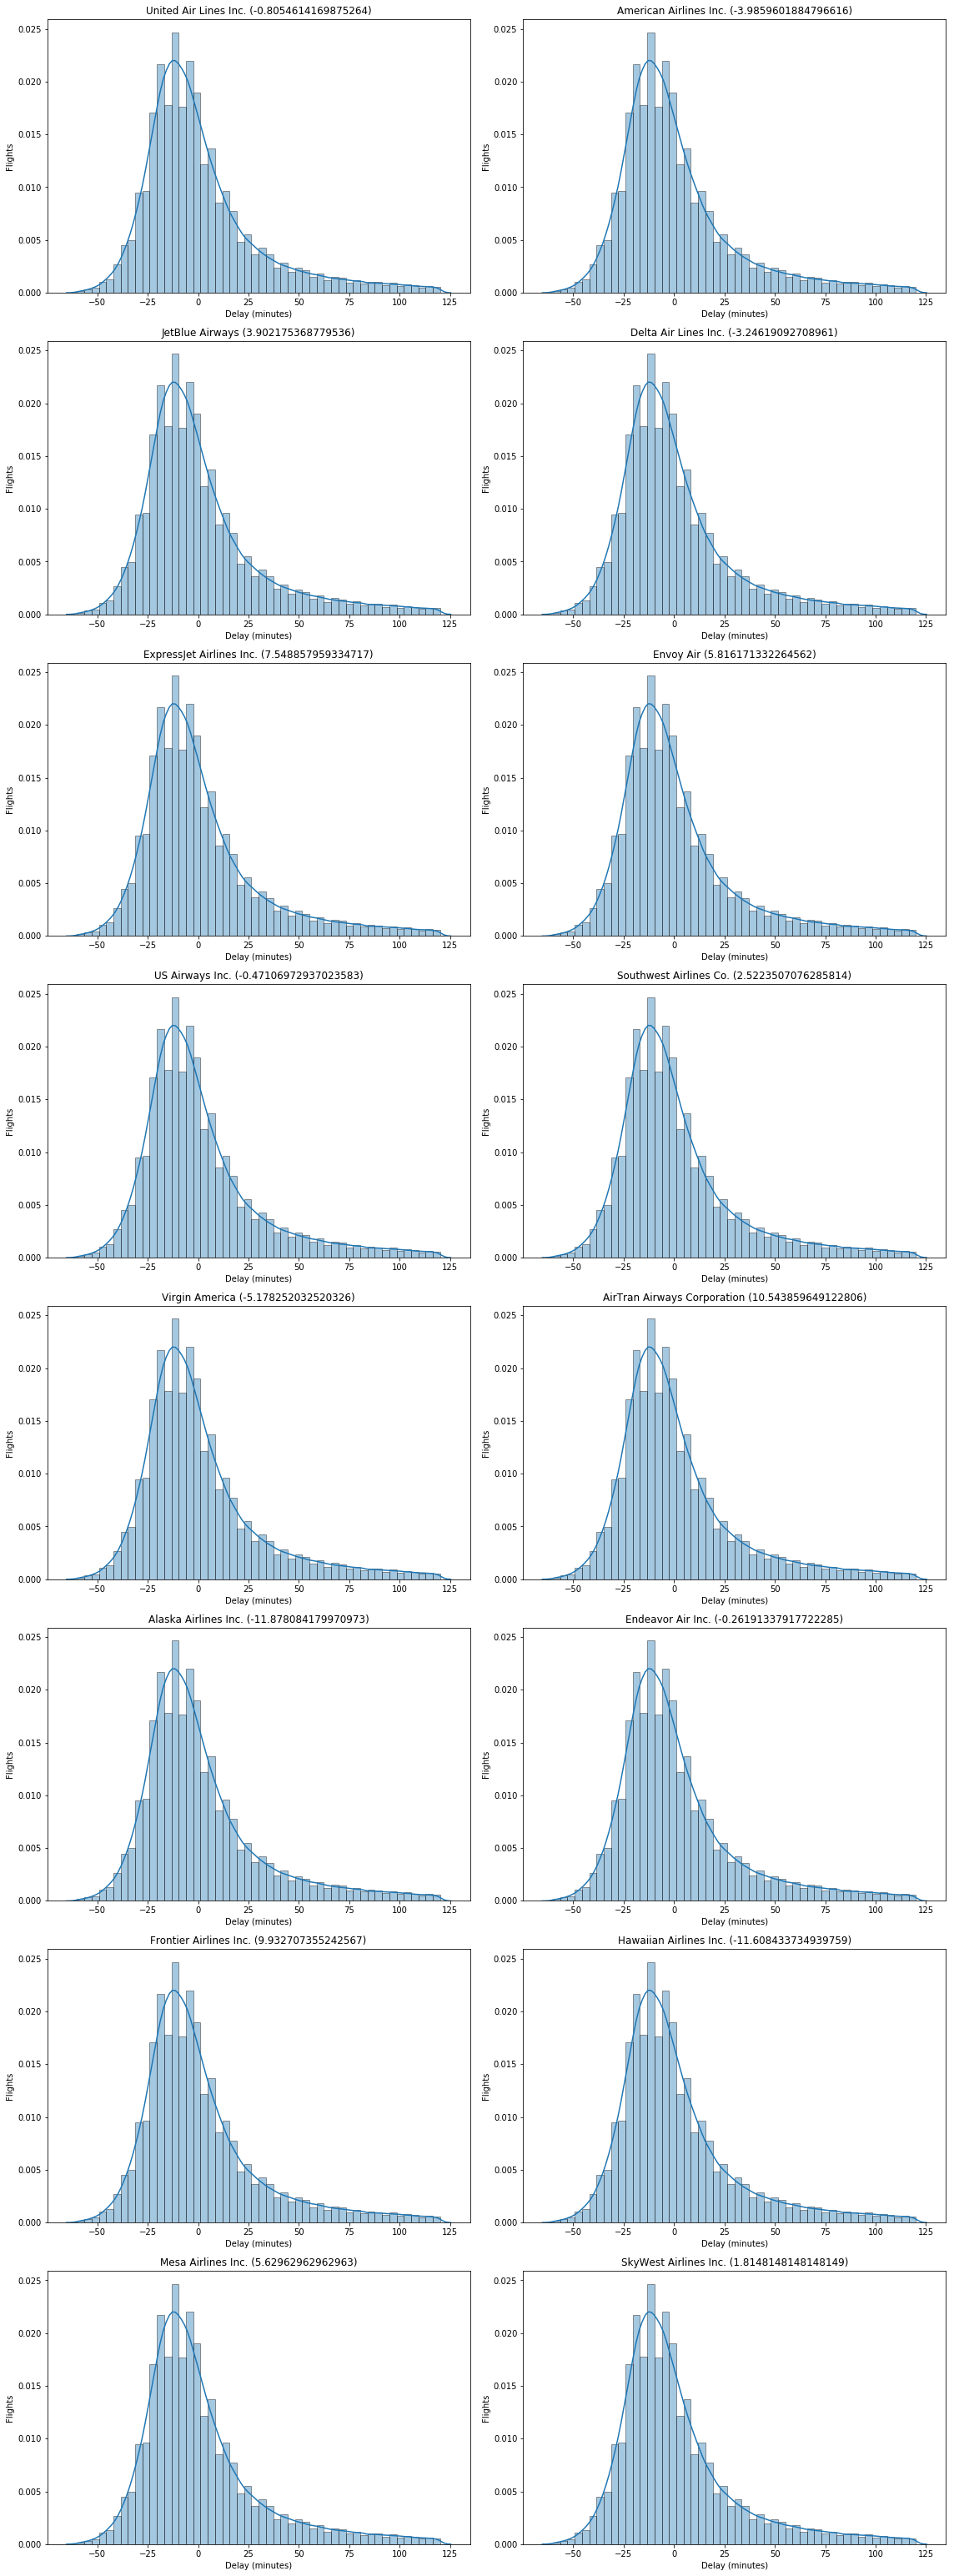

In [78]:
plt.figure(figsize=(16, 64))
for idx, airline in enumerate(airline_names):
  arr_delay = flights[flights["name"]==airline]["arr_delay"]
  plt.subplot(12, 2, idx+1)
  ax = sns.distplot(flights['arr_delay'], hist=True, kde=True, hist_kws={'edgecolor':'black'})
  ax.set(xlabel ='Delay (minutes)', ylabel ='Flights') 
  plt.title("{} ({})".format(airline, arr_delay.mean()))

plt.tight_layout()
plt.show()

From the histogram above we can assume that Hawaiian and Alaska Airlines are the best options. Most of their bars is behind the 0 point. And they have average mean -11 minutes.
It mean most likely they came earlier.

# Central Limit Theorem

In [79]:
print("Count: ", len(flights))
print("Mean: ", flights["arr_delay"].mean())
print("Std: ", flights["arr_delay"].std())

Count:  317113
Mean:  1.2971432896160044
Std:  29.064401023259187


From about we have population 317113. Mean is 1.29. Standard Deviation is 29.06 

**We start with take 100 of data to study**

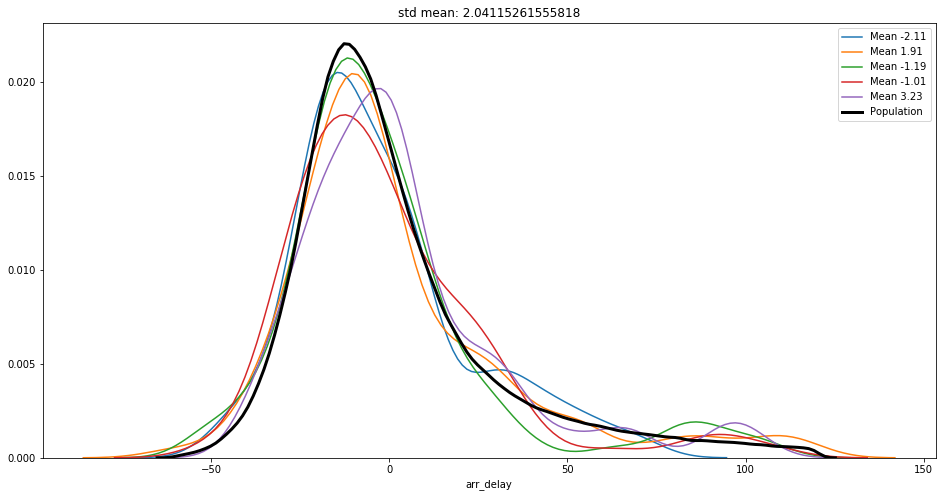

In [88]:
plt.figure(figsize=(16, 8))
means = []
for i in range(5):
  sample = flights.sample(100, random_state=i)
  mean = sample['arr_delay'].mean()
  means.append(mean)
  sns.distplot(sample['arr_delay'], hist=False, kde=True, label="Mean {}".format(sample['arr_delay'].mean()))
sns.distplot(flights['arr_delay'], hist=False, kde=True, label="Population", kde_kws={"color": "black", "linewidth": 3})
plt.title("std mean: {}".format(np.std(means)))
plt.show()

From graph above  of 100 sample distribution: 
* The sample distribution is less spread than the popluation distribution
* The sample distribution shape look similar to normal distribution
* All sample mean stay near population mean 1.29
* The mean of std is 2.04 with is near 29/ sqrt(100) = 2.9

**Now we increase the sample to 1000**

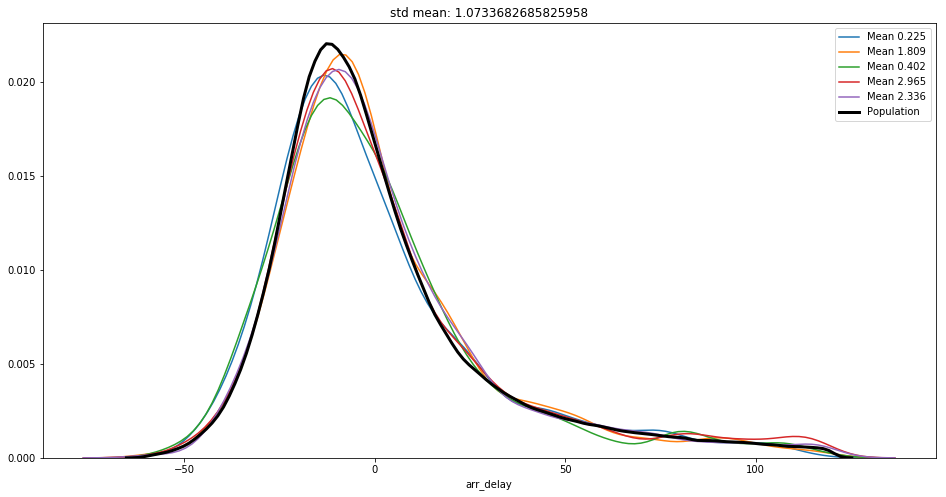

In [90]:
plt.figure(figsize=(16, 8))
means = []
for i in range(5):
  sample = flights.sample(1000, random_state=i)
  mean = sample['arr_delay'].mean()
  means.append(mean)
  sns.distplot(sample['arr_delay'], hist=False, kde=True, label="Mean {}".format(sample['arr_delay'].mean()))
sns.distplot(flights['arr_delay'], hist=False, kde=True, label="Population", kde_kws={"color": "black", "linewidth": 3})
plt.title("std mean: {}".format(np.std(means)))
plt.show()

From graph above  of 1000 sample distribution: 
* The sample distribution is less spread than the popluation distribution
* The sample distribution shape look more similar to normal distribution than the 100 sample
* All sample mean came closer population mean 1.29
* The mean of std is 1.07 with is near 29/ sqrt(1000) = 0.9
* The spread has become smaller than the 100 sample

**Then we increase the sample to 10000**

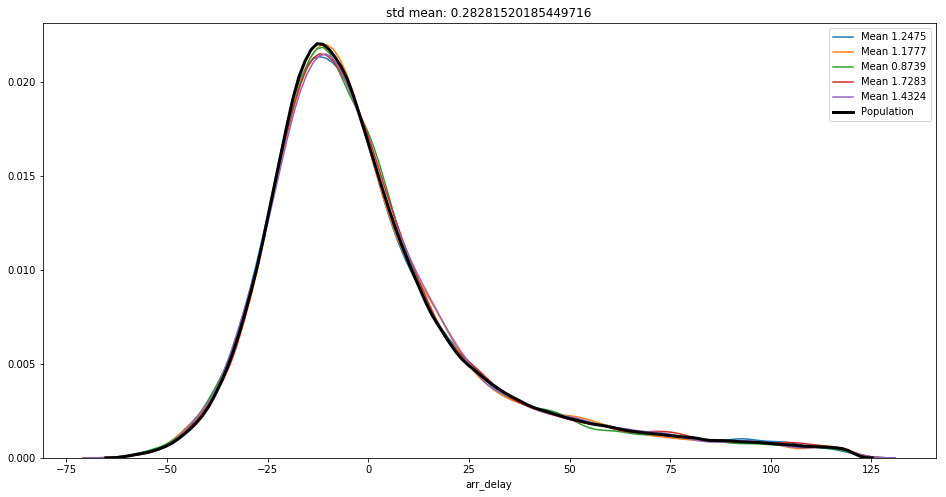

In [91]:
plt.figure(figsize=(16, 8))
means = []
for i in range(5):
  sample = flights.sample(10000, random_state=i)
  mean = sample['arr_delay'].mean()
  means.append(mean)
  sns.distplot(sample['arr_delay'], hist=False, kde=True, label="Mean {}".format(sample['arr_delay'].mean()))
sns.distplot(flights['arr_delay'], hist=False, kde=True, label="Population", kde_kws={"color": "black", "linewidth": 3})
plt.title("std mean: {}".format(np.std(means)))
plt.show()

From graph above of 1000 sample distribution:

* The sample distribution is less spread than the popluation distribution
* The sample distribution shape almost the same to normal distribution than the 1000 sample
* All sample mean really close to population mean 1.29
* The mean of std is 0.28 with is near 29/ sqrt(10000) = 0.29
* The spread has become smaller than the 1000 sample

### Conclusion

From the 3 graphs above:

(μ = population mean, σ = population standard deviation, n = sample size)

1.   The sample distribution of the mean will be less spread than the population distribution of the mean
2.   The sample distribution will be modeled by the normal distribution and getting closer with larger sample size
3.   The spread of the sample distribution is related to population values (μ = mean, std mean = σ/sqrt(n))
4.   Bigger sample lead to smaller spread in the sampling distribution
